# Computer Science 2XC3 - Graded Lab II


Please refer to the pdf for detailed instructions. The below file contains all the preliminary code you will need to work on the lab. You can copy paste instructions here to create one cohesive lab and organize it that best suits your teams workflow.


In [1]:
from __future__ import annotations
from typing import Tuple, Dict, List, Any, Union, Set
from collections import deque
import queue
import random
import timeit
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
class GraphI:
    # using hash map
    def __init__(self, edges):
        self.graph: Dict[int, List[int]] = {}
        for x, y in edges:
            if x not in self.graph:
                self.graph[x] = []
            if y not in self.graph:
                self.graph[y] = []
            self.graph[x].append(y)

    def has_edge(self, src, dst):
        return dst in self.graph and src in self.graph[dst]

    def get_graph_size(self) -> int:
        return len(self.graph)

    def get_graph(self,) -> Dict[int, List[int]]:
        return self.graph

    def remove_edge(self, src, dst):
        self.graph[src].remove(dst)

    def get_neighbors(self, src) -> List[int]:
        if src not in self.graph:
            print(src, self.graph)
        return self.graph[src]

    def add_edge(self, src, dst):
        if src not in self.graph:
            self.graph[src] = []
        if dst not in self.graph:
            self.graph[dst] = []
        if src not in self.graph:
            self.graph[src] = []
        self.graph[src].append(dst)

In [3]:
class GraphII:

    # using adjacency list
    def __init__(self, nodes):
        self.graph = []
        # node numbered 0-1
        for node in range(nodes):
            self.graph.append([])

    def has_edge(self, src, dst):
        return src in self.graph[dst]

    def add_edge(self, src, dst):
        if not self.has_edge(src, dst):
            self.graph[src].append(dst)
            self.graph[dst].append(src)

    def get_graph(self,):
        return self.graph

    def add_edge(self, src, dst):
        if not self.has_edge(src, dst):
            self.graph[src].append(dst)
            self.graph[dst].append(src)

In [4]:
def depth_first_search(G, node, end_point=None):
    stack = [node]
    graph = G.get_graph()
    seen = set()

    while len(stack) != 0:
        node = stack.pop()
        # search for neighbours in graph
        if node not in seen:
            seen.add(node)
            print("Visited node:" + str(node))
            # if the given node has an edge
            if node in graph.keys():
                # iterate over edges of node
                for nn in graph[node]:

                    # limited traversal
                    if nn == end_point:
                        return True
                    # add to stack
                    stack.append(nn)

In [5]:
# Breadth First Search
def breadth_first_search(G, node):
    stack = [node]
    graph = G.get_graph()
    seen = set()

    seen.add(node)

    while len(stack) > 0:
        node = stack[0]
        stack = stack[1:]
        print("Visiting node: " + str(node))
        if node in graph.keys():
            for nn in graph[node]:
                # if node == node2:
                #    return True
                if nn not in seen:
                    stack.append(nn)
                    seen.add(nn)

In [6]:
# Use the methods below to determine minimum vertex covers

def add_to_each(sets, element):
    copy = sets.copy()
    for set in copy:
        set.append(element)
    return copy


def power_set(set):
    if set == []:
        return [[]]
    return power_set(set[1:]) + add_to_each(power_set(set[1:]), set[0])


def is_vertex_cover(G, C):
    for start in G:
        for end in G[start]:
            if not (start in C or end in C):
                return False
    return True


def MVC(G):
    nodes = list(G.keys())
    subsets = power_set(nodes)
    min_cover = nodes
    for subset in subsets:
        if is_vertex_cover(G, subset):
            if len(subset) < len(min_cover):
                min_cover = subset
    return min_cover

## Part 1.1


In [7]:
# Question 1.1
def DFS2(G: Union[GraphI, GraphII], startNode, endNode, visited=None, path=None) -> Union[List[int], None]:
    if visited is None:
        visited = set()
    if path is None:
        path = []

    # Mark the current node as visited and add it to the path
    visited.add(startNode)
    path.append(startNode)

    if startNode == endNode:  # If the current node is the end node, return the path
        return path

    if startNode in G.graph:  # Recursively visit neighboring nodes
        for neighbor in G.graph[startNode]:
            if neighbor not in visited:

                result = DFS2(
                    G, neighbor, endNode, visited, path.copy())  # Recursive call to DFS
                if result:
                    return result

    return None  # If no path is found, return None


def BFS2(G: GraphI, startNode, endNode):
    # Initialize a queue for BFS
    queue = deque()

    # Enqueue the start node and mark it as visited
    queue.append((startNode, [startNode]))
    visited = set([startNode])

    # Perform BFS
    while queue:
        current_node, path = queue.popleft()
        # If the current node is the end node, return the path
        if current_node == endNode:
            return path
        # Enqueue neighboring nodes if they haven't been visited
        if current_node in G.graph:
            for neighbor in G.graph[current_node]:
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))
                    visited.add(neighbor)

    # If no path is found, return None
    return None

## Part 1.2


In [8]:
def DFS3(G: Union[GraphI, GraphII], startNode):
    # Initialize a stack for DFS
    stack = [startNode]
    visited = set()

    # Perform DFS to find paths to all nodes
    predDict: Dict[int, Union[int, None]] = {}

    predDict[startNode] = None

    while stack:
        currentNode = stack.pop()
        if currentNode not in visited:
            visited.add(currentNode)
            for neighbor in G.graph.get(currentNode, []):
                predDict[neighbor] = currentNode
                stack.append((neighbor))
    return predDict


def BFS3(G: Union[GraphI, GraphII], startNode):
    # Initialize a queue for BFS
    queue = deque()

    # Enqueue the start node and mark it as visited
    queue.append(startNode)
    visited = set()  # Keep track of visited nodes and their parent

    predDict: Dict[int, Union[int, None]] = {}

    predDict[startNode] = None

    # Perform BFS to find shortest path to all nodes
    while queue:
        currentNode = queue.popleft()
        # Enqueue neighboring nodes if they haven't been visited
        if currentNode in G.graph:
            for neighbor in G.graph[currentNode]:
                if neighbor not in predDict:
                    queue.append(neighbor)
                    # Mark neighbor as visited with current node as parent
                    predDict[neighbor] = currentNode

    return predDict

### Testing (1.1 and 1.2)


In [9]:
graph = GraphI([
    (1, 2),
    (1, 3),
    (2, 4),
    (3, 4),
    (3, 5),
    (4, 6),
    (4, 5),
])

print(DFS2(graph, 1, 6))  # > [1, 2, 4, 6]
print(BFS2(graph, 1, 6))  # > [1, 2, 4, 6]
print(DFS3(graph, 1))  # > {1: None, 2: 1, 3: 1, 4: 2, 5: 4, 6: 4}
print(BFS3(graph, 1))  # > {1: None, 2: 1, 3: 1, 4: 2, 5: 4, 6: 4}

[1, 2, 4, 6]
[1, 2, 4, 6]
{1: None, 2: 1, 3: 1, 4: 2, 5: 4, 6: 4}
{1: None, 2: 1, 3: 1, 4: 2, 5: 3, 6: 4}


## Part 1.3


In [10]:
G = GraphI([(1, 3), (1, 4), (2, 3), (2, 4), (2, 5), (3, 5)])


def has_cycle(G: Union[GraphI, GraphII]):
    def dfs(G: Union[GraphI, GraphII], node, visited, currentPathVisited):
        # utility function that performs DFS
        # on a node and determines if it is
        # part of a cycle

        if node in currentPathVisited:
            # this determines a cycle
            return True

        if node in visited:
            # if we have already visited the node
            # then we know that no cycle contains this
            # node so we can just return False
            return False

        visited.add(node)
        currentPathVisited.add(node)

        for neighbor in G.get_neighbors(node):
            # we complete DFS for all neighbors of this node
            if dfs(G, neighbor, visited, currentPathVisited):
                return True

        # if no neighbor has a cycle, we return false
        return False

    visited = set()
    for node in G.get_graph().keys():
        if node not in visited:
            currentPathVisited = set()

            if dfs(G, node, visited, currentPathVisited):
                return True
    return False


print(has_cycle(G))

False


## Part 1.4


In [11]:
def get_path(G: GraphI, start: int, end: int, visited=None, l=0) -> Tuple[bool, int]:
    if visited is None:
        visited = set()

    if start == end:
        return True, 1

    visited.add(start)
    for neighbor in G.get_neighbors(start):
        if neighbor not in visited:
            if get_path(G, neighbor, end, visited, l + 1):
                return True, l + 1
    return False, -1


def has_path(G: GraphI, start: int, end: int, visited=None) -> bool:
    if visited is None:
        visited = set()

    visited.add(start)
    for neighbor in G.get_neighbors(start):
        if neighbor not in visited and neighbor != end:
            p, length = get_path(G, neighbor, end, visited, 0)
            if p and length >= 1:
                return True

    return False


def is_connected(G: GraphI) -> bool:
    for n1 in G.get_graph().keys():
        for n2 in G.get_graph().keys():
            if n1 != n2:
                if has_path(G, n1, n2):
                    return True
    return False


print(is_connected(GraphI([(1, 2), (3, 4), (4, 5)])))  # > True (3 -> 4 -> 5)
print(is_connected(GraphI([(1, 2), (3, 4), (5, 6)])))  # > False

True
False


## Part 1.5


In [12]:
def create_random_graph(n: int, e: int) -> GraphI:
    # Create a random graph with n nodes and e edges
    # returns a dictionary representing the graph

    graph = GraphI([])

    while e > 0:
        src = random.randint(0, n - 1)
        dst = random.randint(0, n - 1)

        if src == dst or graph.has_edge(src, dst):
            continue

        graph.add_edge(src, dst)
        e -= 1

    return graph

## Part 1.6


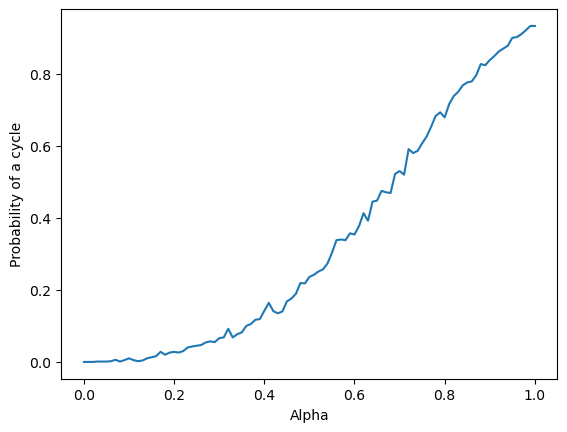

In [13]:
def get_probability_of_cycle(n: int, alpha: float):

  # parameters
    # e = math.floor(math.sqrt(n))  # we set number of edges to be sqrt(n)
    e = math.floor(n * alpha)  # we set number of edges to be sqrt(n)

    trials = 1000
    cycles = 0
    for i in range(trials):
        graph = create_random_graph(n, e)
        if has_cycle(graph):
            cycles += 1

    return cycles / trials


def plot_probability_of_cycle():
    # Plots the probability of a cycle in a random graph
    # with n nodes and e edges

    n = 100
    alpha = 0
    x = []
    y = []

    while alpha <= 1.01:
        x.append(alpha)
        y.append(get_probability_of_cycle(n, alpha))
        alpha += 0.01

    plt.plot(x, y)
    plt.xlabel("Alpha")
    plt.ylabel("Probability of a cycle")
    plt.show()


plot_probability_of_cycle()

### Experiment design

We choose a value alpha from which we derive e as floor(n \* alpha). We set alpha initially to 0 (and get an expected probability of 0). We increase alpha by 0.01 each iteration, to see how the probabilities of getting a cycle increases as alpha approaches 1.01 (e = n + 1, which means that in a directed graph, assuming there are no duplicate edges. the changes of a cycle is 100%)

This lets us see the the inputs that achieve a probability of 0% to 100%. We chose 1000 iterations for determining the chances of a cycle for a graph with n, e values since it is enough iterations to converse to a reasonabily confident value, and not too computationally intensive

We chose n = 100 to allow us to add one edge each iteration (we increment by 0.01). And any number higher becomes more computationally demanding

### Results

We notice that the graph looks like a sigmoid curve, with probabilities increasing and an exponential rate with respect to alpha. We can see that the relationship between P(Cycle) is exponentially related to alpha


## Part 1.7


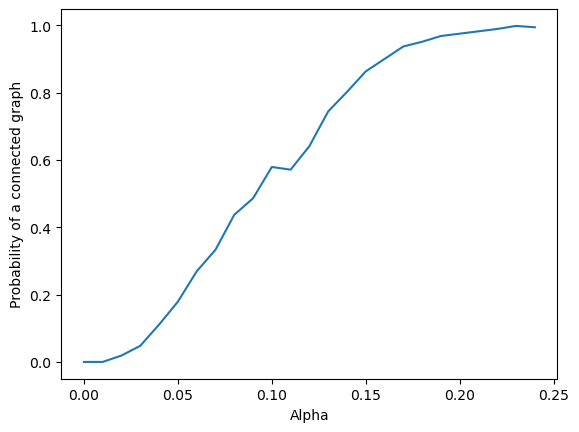

In [14]:
def get_probability_of_connected(n: int, alpha: float):

  # parameters
    # e = math.floor(math.sqrt(n))  # we set number of edges to be sqrt(n)
    e = math.floor(n * alpha)  # we set number of edges to be sqrt(n)

    trials = 1000
    cycles = 0
    for i in range(trials):
        graph = create_random_graph(n, e)
        if is_connected(graph):
            cycles += 1

    return cycles / trials


def plot_probability_of_connected():
    # Plots the probability of a cycle in a random graph
    # with n nodes and e edges

    n = 100
    alpha = 0
    x = []
    y = []

    while alpha <= 0.25:
        x.append(alpha)
        y.append(get_probability_of_connected(n, alpha))
        alpha += 0.01

    plt.plot(x, y)
    plt.xlabel("Alpha")
    plt.ylabel("Probability of a connected graph")
    plt.show()


plot_probability_of_connected()

### Experiment design

We decided to use a similar experiment design to the cycle probability experiment, changing some of the parameters, limit alpha to 0.3, since the probability of a connected graph seems to plateau after that. We choose to derive e based on an alpha value because the probability should be correlated to some measure of sparcity rather than edge count, which is what alpha is

### results

It seems that the relationship between cycles and alpha is roughly linear, and approaches 100% as alpha approaches 25%


## Part 2.1


In [15]:
import random


def get_highest_degree_vertex(G: Dict[int, List[int]]) -> int:
    # Returns the vertex with the highest degree
    # in G
    max_degree = 0
    max_vertex = -1
    for v in G:
        if len(G[v]) > max_degree:
            max_degree = len(G[v])
            max_vertex = v
    return max_vertex


def Approx1(G: GraphI) -> Set[int]:

    C: Set[int] = set()

    mock_graph = G.get_graph().copy()

    while True:
        v = get_highest_degree_vertex(mock_graph)
        C.add(v)
        mock_graph[v] = []  # remove all incident edges to v
        if is_vertex_cover(G.get_graph(), C):
            return C

## Part 2.2


In [16]:
def Approx2(G: GraphI) -> Set[int]:
    C: Set[int] = set()

    while True:
        vertices = list(G.get_graph().keys())
        v = random.choice(vertices)
        C.add(v)
        G.get_graph()[v] = []  # remove all incident edges to v

        if is_vertex_cover(G.get_graph(), C):
            return C
        else:
            continue

## Part 2.3


In [17]:
import random
import copy


def removeAllIncidentEdges(G: GraphI, v: int):
    for neighbor in G.get_neighbors(v):
        G.remove_edge(v, neighbor)

    G.get_graph()[v] = []


def Approx3(graph: GraphI) -> Set[int]:
    # Creating a local copy of the input graph
    G: GraphI = copy.deepcopy(graph)

    C = set()

    edges = [(x, y) for x in G.get_graph() for y in G.get_neighbors(x)]

    while len(edges) > 0:
        random_edge = random.choice(edges)
        C.add(random_edge[0])
        C.add(random_edge[1])
        removeAllIncidentEdges(G, random_edge[0])
        removeAllIncidentEdges(G, random_edge[1])

        if is_vertex_cover(graph.get_graph(), C):
            return C

    return C


G = {
    1: [2, 3],
    4: [5, 6],
}

arr = []
for k, v in G.items():
    for i in v:
        arr.append((k, i))

G = GraphI(arr)
print(Approx1(G))
print(Approx2(G))
print(Approx3(G))
print(MVC(G.get_graph()))

{1, 4}
{1, 3, 5, 6}
{4, 6}
[4]


## Part 2.4


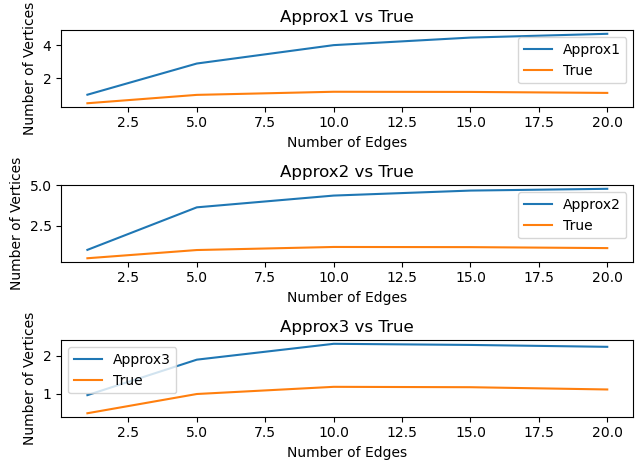

In [18]:
import matplotlib.pyplot as plt
num_edges = [1, 5, 10, 15, 20]


true_values = []

Approx1_values = []
Approx2_values = []
Approx3_values = []


for e in num_edges:
    Approx1_sums = []
    Approx2_sums = []
    Approx3_sums = []
    true_sums = []
    for i in range(100):
        G = create_random_graph(6, e)

        Approx1_sums.append(len(Approx1(G)))
        Approx2_sums.append(len(Approx2(G)))
        Approx3_sums.append(len(Approx3(G)))
        true_sums.append(len(MVC(G.get_graph())))

    Approx1_values.append(sum(Approx1_sums) / len(Approx1_sums))
    Approx2_values.append(sum(Approx2_sums) / len(Approx2_sums))
    Approx3_values.append(sum(Approx3_sums) / len(Approx3_sums))
    true_values.append(sum(true_sums) / len(true_sums))


# Plotting Approx1 values
plt.subplot(3, 1, 1)
plt.plot(num_edges, Approx1_values, label='Approx1')
plt.plot(num_edges, true_values, label='True')
plt.xlabel('Number of Edges')
plt.ylabel('Number of Vertices')
plt.title('Approx1 vs True')
plt.legend()

# Plotting Approx2 values
plt.subplot(3, 1, 2)
plt.plot(num_edges, Approx2_values, label='Approx2')
plt.plot(num_edges, true_values, label='True')
plt.xlabel('Number of Edges')
plt.ylabel('Number of Vertices')
plt.title('Approx2 vs True')
plt.legend()

# Plotting Approx3 values
plt.subplot(3, 1, 3)
plt.plot(num_edges, Approx3_values, label='Approx3')
plt.plot(num_edges, true_values, label='True')
plt.xlabel('Number of Edges')
plt.ylabel('Number of Vertices')
plt.title('Approx3 vs True')
plt.legend()

plt.tight_layout()

# Adjusting the layout
# Display the plots
plt.show()

The approximations seem to have a noticable gap. The approximation functions seem to include unnecessary nodes in the MVC. This discrepancy gets worse as the number of edges in the graph increases


## Part 2.5


In [19]:
from itertools import combinations


def check_independent_set(G: Dict[int, List[int]], S: tuple) -> bool:
    # Check if the set S is an independent set in graph G
    for u in S:
        for v in S:
            if u != v and v in G[u]:
                return False
    return True


def MIS(G: Dict[int, List[int]]) -> list:
    # Find a maximum independent set in graph G
    nodes = list(G.keys())
    max_independent_set = set()

    for r in range(len(nodes) + 1):
        for subset in combinations(nodes, r):
            if check_independent_set(G, subset):
                if len(subset) > len(max_independent_set):
                    max_independent_set = set(subset)

    return list(max_independent_set)


G1 = {
    0: [1, 2],
    1: [0, 3],
    2: [0],
    3: [1]
}

## Part 2.6


In [22]:
def complement_of_set(total_nodes, subset):
    return set(range(total_nodes)) - set(subset)


num_nodes = 10
edges = 10
random_graph = create_random_graph(num_nodes, edges)

mis = MIS(random_graph.get_graph())
mvc = complement_of_set(num_nodes, mis)

print("Graph:", random_graph.get_graph())
print("MIS:", mis, "Size:", len(mis))
print("MVC:", mvc, "Size:", len(mvc))
print("Total Nodes:", num_nodes, "MIS + MVC:", len(mis) + len(mvc))

Graph: {2: [5, 9, 9], 5: [9, 0], 1: [9, 5], 9: [], 4: [8, 0], 8: [], 0: [], 6: [5]}
MIS: [0, 1, 2, 6, 8] Size: 5
MVC: {3, 4, 5, 7, 9} Size: 5
Total Nodes: 10 MIS + MVC: 10


Yes, there is a fundamental relationship between the Maximum Independent Set (MIS) and the Minimum Vertex Cover (MVC) in a graph theory. In any graph, the sum of the sizes of the MIS and the MVC is equal to the total number of vertices in the graph. This is because the MIS and MVC are complementary sets with respect to the vertex set of the graph. The complement of a vertex cover in any graph is an independent set, so a minimum vertex cover is complementary to a maximum independent set.


## 2.7


In any graph, the sum of the sizes of the MIS and the MVC is equal to the total number of vertices in the graph. This is because the MIS and MVC are complementary sets with respect to the vertex set of the graph.

Both algorithms employ a brute-force or heuristic approach. The MIS function checks all possible combinations of nodes, which has an exponential time complexity and is thus not efficient for large graphs. The MVC function uses a greedy heuristic, which can be much faster but does not guarantee the smallest vertex cover.

The MIS function is guaranteed to find a maximum independent set because it exhaustively checks all possibilities. However, the MVC function is not guaranteed to find the minimum vertex cover due to its heuristic nature; it only guarantees a vertex cover, not the smallest one.

While the total number of vertices in a graph may not always equal the sum of the average sizes of MIS and MVC across several random graphs, it frequently does.

Empirically, we can infer that, in most cases, the size of the MIS and MVC have an inverse relationship; however, the precise nature of this relationship varies based on the particular features of the graphs.

Worst-case time complexity of MIS: The time complexity of the MIS function is O(2^n \* n^2) where n is the number of nodes in the graph. This is because the function iterates through all possible subsets of nodes, which is 2^n subsets, and for each subset, it checks if it is an independent set by iterating through all pairs of nodes in the subset, resulting in a time complexity of O(n^2) for each subset. Therefore, the overall time complexity is O(2^n . n^2).

Worst-case time complexity of MVC: "get_highest_degree_vertex" is called once per iteration of the while loop, contributing O(n) each time. "is_vertex_cover" is called once per iteration of the while loop, contributing O(e) each time. The while loop can run up to n times in the worst case. So, the total worst-case time complexity of min_vertex_cover is O(n^2 + n.e).


### Saad (Khalis68) -> 1.3,1.4,1.5,1.6,1.7,2.1,2.2,2.4

### Jenil (maruj) -> 2.5, 2.6, 2.7

### Pritha (sahap) -> 1.1, 1.2, 2.3
